Acknowledgements:

http://www.sloansportsconference.com/wp-content/uploads/2014/02/2014_SSAC_The-Hot-Hand-A-New-Approach.pdf

In [46]:
import pandas as pd
import os

In [47]:
adv_shot_logs = pd.read_csv('datasets\\adv_shot_logs.csv')
adv_shot_logs.head()

GAME_ID                     MATCHUP LOCATION  W  FINAL_MARGIN  \
0  21400010    OCT 29, 2014 - CHI @ NYK        A  W            24   
1  21400447  DEC 27, 2014 - CHI vs. NOP        H  W             7   
2  21400447  DEC 27, 2014 - CHI vs. NOP        H  W             7   
3  21400447  DEC 27, 2014 - CHI vs. NOP        H  W             7   
4  21400379  DEC 18, 2014 - CHI vs. NYK        H  W             6   

   SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES ...   \
0            3       2      10:23        18.1         5 ...    
1            2       1       0:20         3.4         7 ...    
2            4       2       9:43        14.0         3 ...    
3           13       4      11:45         9.0         5 ...    
4            4       2       7:21        15.0        10 ...    

   CLOSEST_DEFENDER  CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  FGM PTS  \
0       Acy, Quincy                      203112             2.3    1   2   
1    Ajinca, Alexis                      201582             7.1    0   0   
2    Ajinca, Alexis                      201582             4.2    0   0   
3    Ajinca, Alexis                      201582             2.2    1   2   
4     Aldrich, Cole                      202332             5.0    1   2   

    player_name  player_id  player_height    TS% DBPM  
0  aaron brooks     201166          183.0  0.534 -2.4  
1  aaron brooks     201166          183.0  0.534 -2.4  
2  aaron brooks     201166          183.0  0.534 -2.4  
3  aaron brooks     201166          183.0  0.534 -2.4  
4  aaron brooks     201166          183.0  0.534 -2.4  

[5 rows x 24 columns]

In [48]:
#let's write the code that keeps track of the points in the game
adv_shot_logs.insert(len(adv_shot_logs.columns), 'abs_clock', 0)
adv_shot_logs.insert(len(adv_shot_logs.columns), 'pts_home', 0)
adv_shot_logs.insert(len(adv_shot_logs.columns), 'pts_away', 0)
adv_shot_logs.insert(len(adv_shot_logs.columns), 'pts_home_minus_away', 0)
print(adv_shot_logs.columns)


Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id', 'player_height', 'TS%', 'DBPM', 'pts_home',
       'pts_away', 'pts_home_minus_away'],
      dtype='object')


In [49]:
small_adv_shot_logs = pd.DataFrame(adv_shot_logs[0:20])
print(small_adv_shot_logs.shape)

print(small_adv_shot_logs)

(20, 27)
     GAME_ID                     MATCHUP LOCATION  W  FINAL_MARGIN  \
0   21400010    OCT 29, 2014 - CHI @ NYK        A  W            24   
1   21400447  DEC 27, 2014 - CHI vs. NOP        H  W             7   
2   21400447  DEC 27, 2014 - CHI vs. NOP        H  W             7   
3   21400447  DEC 27, 2014 - CHI vs. NOP        H  W             7   
4   21400379  DEC 18, 2014 - CHI vs. NYK        H  W             6   
5   21400328  DEC 12, 2014 - CHI vs. POR        H  W             9   
6   21400183    NOV 21, 2014 - CHI @ POR        A  L           -18   
7   21400183    NOV 21, 2014 - CHI @ POR        A  L           -18   
8   21400183    NOV 21, 2014 - CHI @ POR        A  L           -18   
9   21400242    NOV 30, 2014 - CHI @ BKN        A  W            18   
10  21400062    NOV 05, 2014 - CHI @ MIL        A  W             9   
11  21400735    FEB 04, 2015 - CHI @ HOU        A  L           -11   
12  21400209    NOV 25, 2014 - CHI @ DEN        A  L            -5   
13  2140020

In [51]:
small_adv_shot_logs_gamesorted = small_adv_shot_logs.sort_values(['GAME_ID','PERIOD'])
#small_adv_shot_logs_gamesorted = small_adv_shot_logs_gamesorted.sort_values('SHOT_CLOCK',ascending=False)
print(small_adv_shot_logs_gamesorted)

     GAME_ID                     MATCHUP LOCATION  W  FINAL_MARGIN  \
0   21400010    OCT 29, 2014 - CHI @ NYK        A  W            24   
10  21400062    NOV 05, 2014 - CHI @ MIL        A  W             9   
15  21400101  NOV 10, 2014 - CHI vs. DET        H  W            11   
16  21400101  NOV 10, 2014 - CHI vs. DET        H  W            11   
17  21400101  NOV 10, 2014 - CHI vs. DET        H  W            11   
6   21400183    NOV 21, 2014 - CHI @ POR        A  L           -18   
7   21400183    NOV 21, 2014 - CHI @ POR        A  L           -18   
8   21400183    NOV 21, 2014 - CHI @ POR        A  L           -18   
12  21400209    NOV 25, 2014 - CHI @ DEN        A  L            -5   
13  21400209    NOV 25, 2014 - CHI @ DEN        A  L            -5   
14  21400209    NOV 25, 2014 - CHI @ DEN        A  L            -5   
9   21400242    NOV 30, 2014 - CHI @ BKN        A  W            18   
19  21400257  DEC 02, 2014 - CHI vs. DAL        H  L            -3   
5   21400328  DEC 12

In [42]:
def newGame(df, shot_idx):
    if shot_idx == 0:
        return True
    return (df.loc[shot_idx, 'GAME_ID'] != df.loc[shot_idx-1, 'GAME_ID'])


def getRunningPoints(df):
    points_home = []
    points_away = []
    points_home_minus_away = []
    A_count = 0
    H_count = 0
    numGames = 0
    
    for ii in range(1, df.shape[0]):
        isHome = df.loc[ii,'LOCATION'] == 'H'
        #H_count += isHome
        #A_count += (not isHome)
        if(newGame(df, ii)):
            continue
        else:
            pts_made = df.loc[ii, 'PTS']
            if isHome:
                df.loc[ii,'pts_home'] = df.loc[ii-1,'pts_home'] + pts_made
                df.loc[ii,'pts_away'] = df.loc[ii-1,'pts_away']
            else:
                df.loc[ii,'pts_home'] = df.loc[ii-1,'pts_home']
                df.loc[ii,'pts_away'] = df.loc[ii-1,'pts_away'] + pts_made
            df.loc[ii,'pts_home_minus_away'] = df.loc['pts_home'] - df.loc['pts_away']

getRunningPoints(small_adv_shot_logs)

print(small_adv_shot_logs)

KeyError: 'the label [pts_home] is not in the [index]'

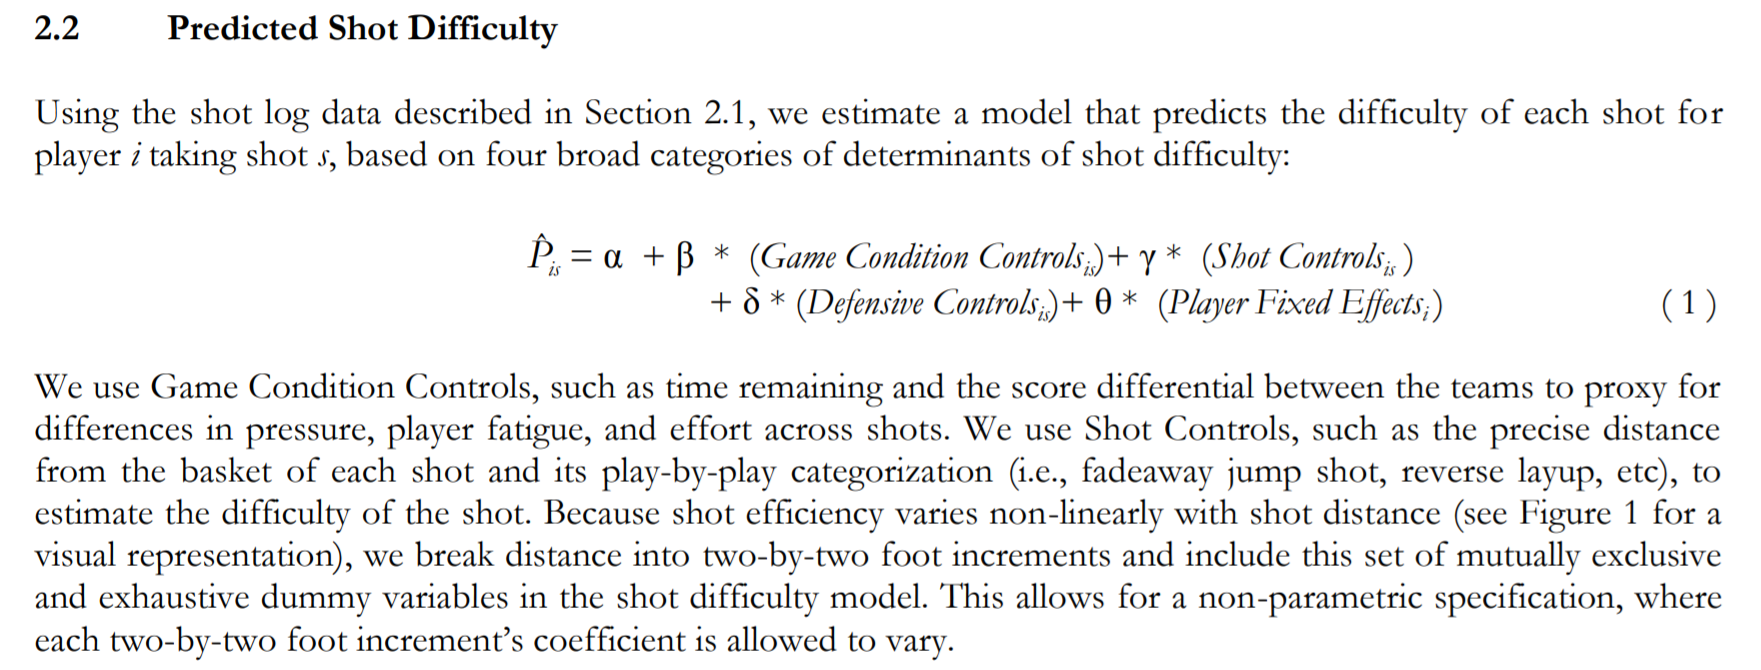

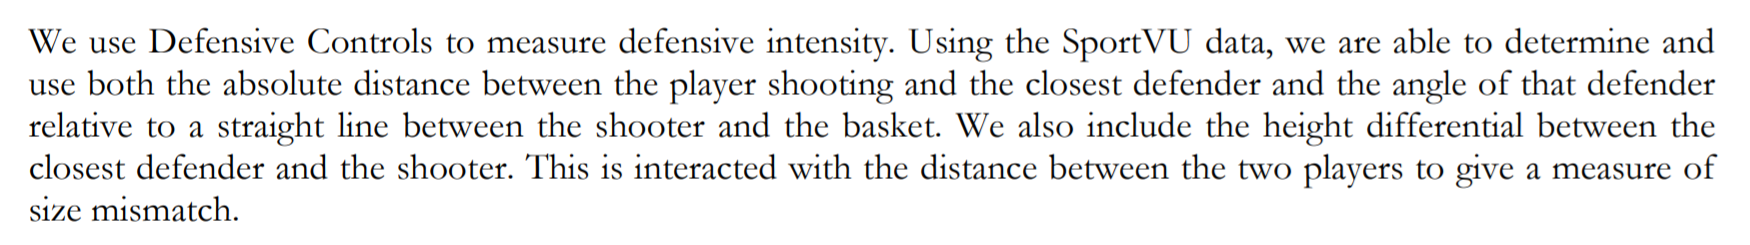

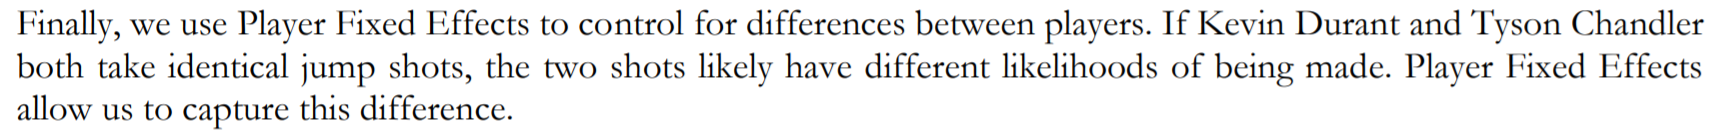

In [ ]:
#game condition will be defined as a combination of 
# home/away, period, game clock, score difference

#shot controls will be defined as a combination of 
# shot_dist, pts_type, shot_clock

#Defensive controls will be defined as a combination of 
# closest_defender_dist, closest_defender_skill, height difference
# 

#player fixed effects
# offensive_skill
# we will use true shooting rate


#data we need to generate
# score difference, height difference, defensive_skill, offensive_skill



In [ ]:
path_to_dataframe = ('\\datasets\\data.csv')

df = pd.read_csv(path_to_dataframe)

train_conditions_df = df 20%

game_condition_controls_model = LinearRegression()
game_conditions = train_conditions_df([isAway, period, abs_clock, (isAway)*points_home_minus_away+(isAway-1)*points_home_minus_away])
game_condition_controls_model.fit(x = game_conditions, y=gameLoss)


shot_condition_controls_model = LinearRegression()
shot_conditions = train_conditions_df([shot_dist, pts_type, shot_clock])
shot_condition_controls_model.fit(x=shot_conditions, y=shot_missed)



defensive_condition_controls_model = LinearRegression()
defensive_conditions = train_conditions_df[closest_defender_dist, defender_DBPM, height_difference]
defensive_condition_controls_model.fit(x=defensive_conditions, y=shot_missed)



player_fixed_effects_model = LinearRegression()
player_fixed_effects = train_conditions_df[TS]
player_fixed_effects_model.fit(x=player_fixed_effects, y=shot_missed)


test_conditions_df = df 20%


game_condition_controls_model_predictions = game_condition_controls_model.predict(x = test_conditions_df)
shot_condition_controls_model_predictions = shot_condition_controls_model.predict(x = test_conditions_df)
defensive_condition_controls_model_predictions = defensive_condition_controls_model.predict(x = test_conditions_df)
player_fixed_effects_model_predictions = player_fixed_effects_model.predict(x = test_conditions_df)

condition_controls_predictions = dataframe(game_condition_controls_model_predictions, shot_condition_controls_model_predictions, \
                            defensive_condition_controls_model_predictions, player_fixed_effects_model_predictions)
    
    

Predicted_shot_difficulty_model = LinearRegression()

Predicted_shot_difficulty_model.fit(x = condition_controls, y = shot_missed )


test_shot_difficulty = df 20%

Predicted_shot_difficulty_predictions = Predicted_shot_difficulty_model(x=Predicted_shot_difficulty_model)




Compare the predicted shot difficulty vs the shot made or not





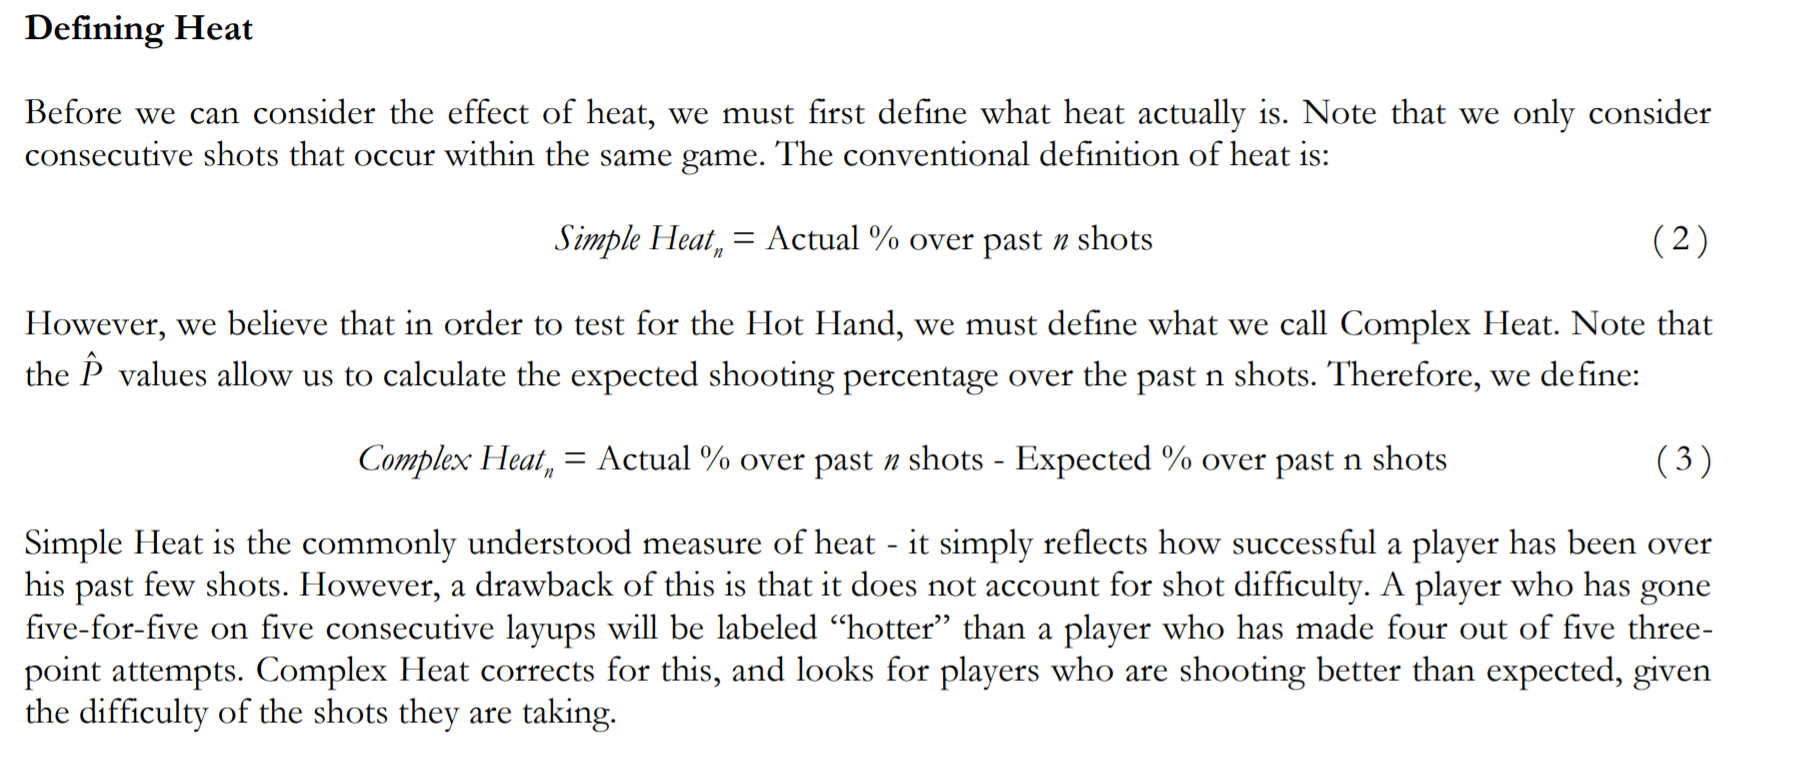

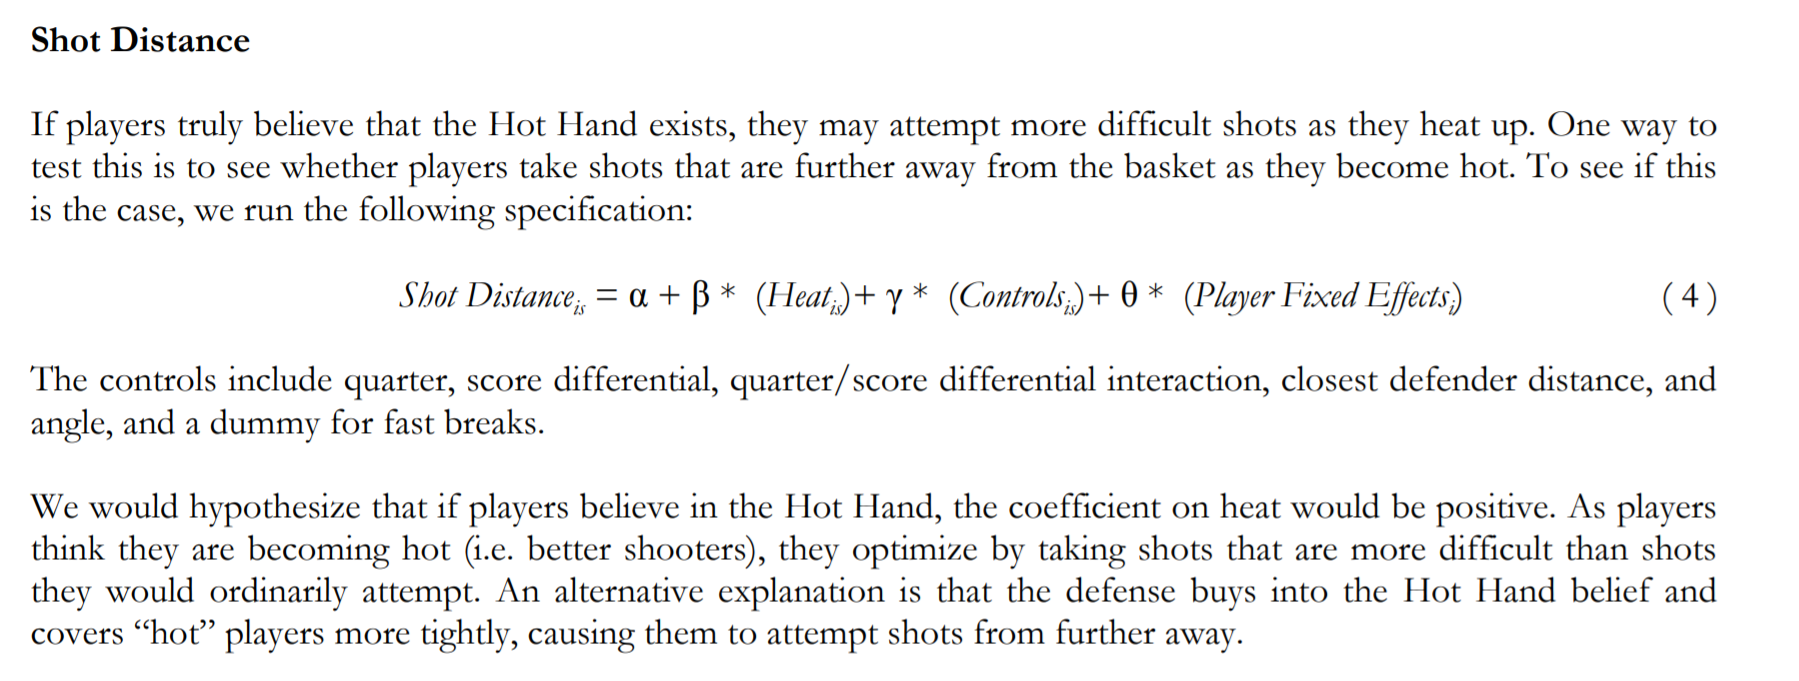

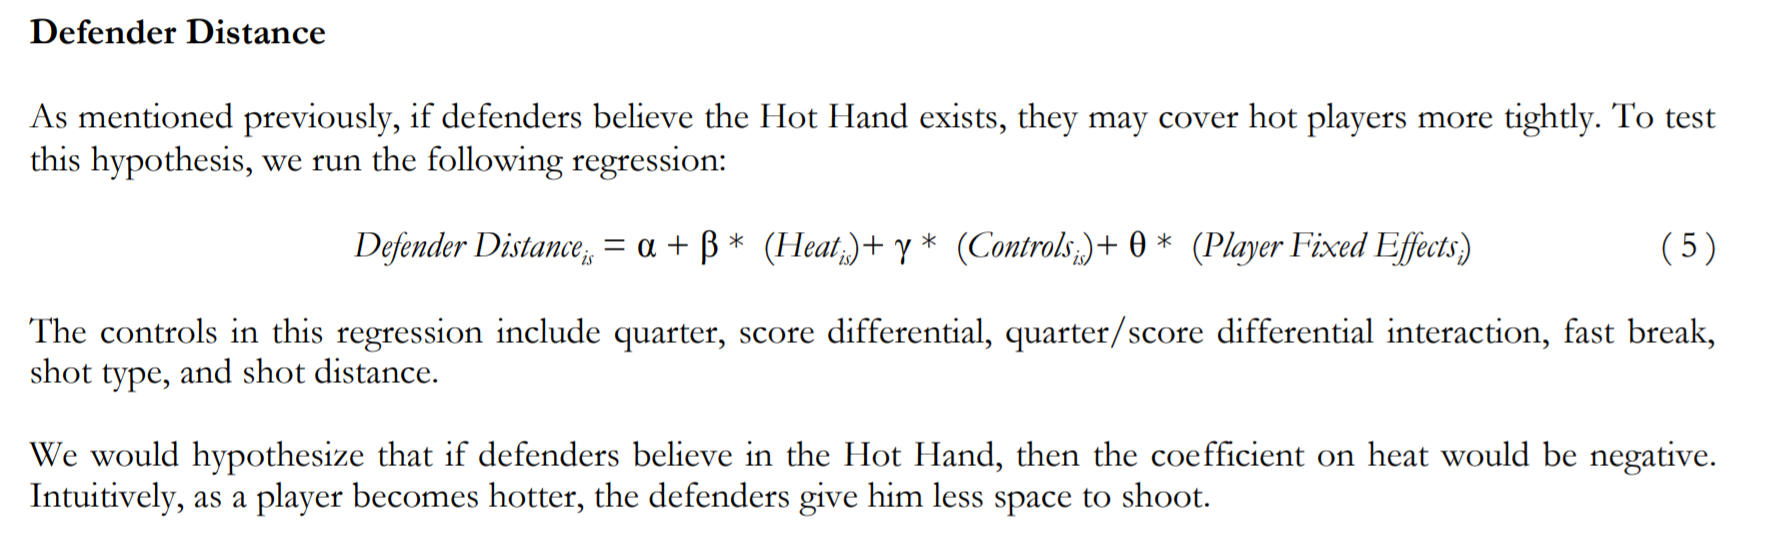

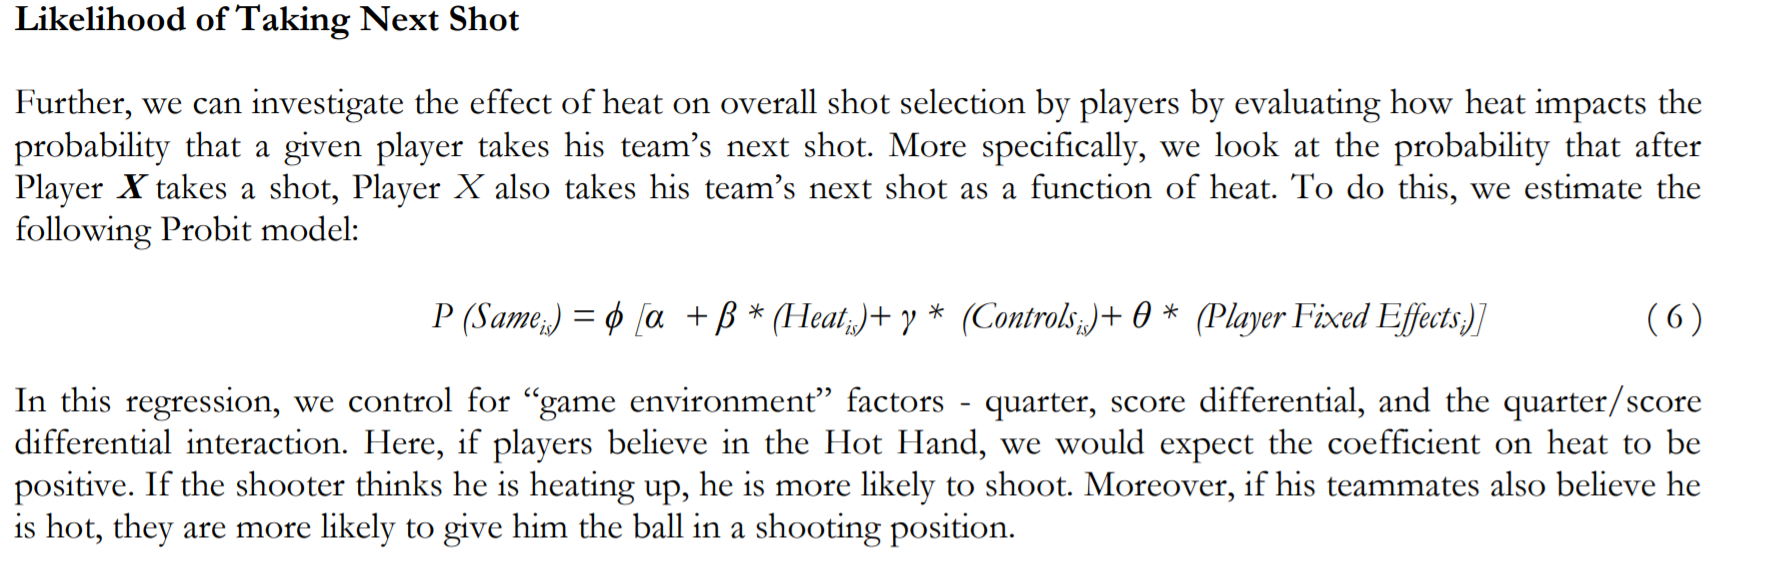

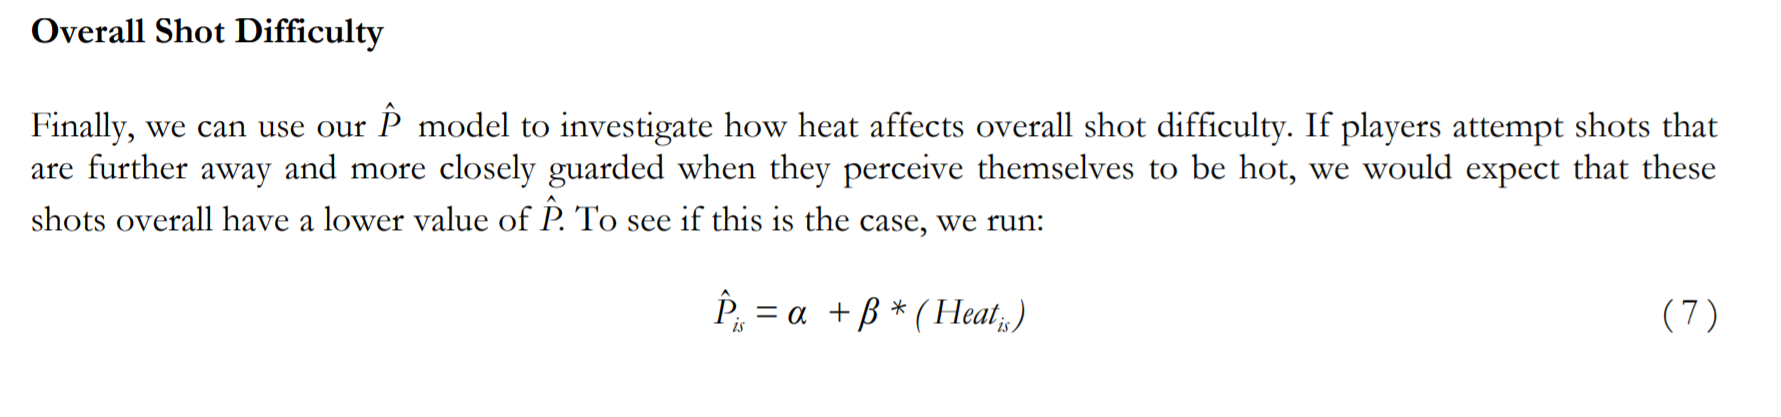